This notebook should walk through how we'll be reading in the data and give the basics on how to get started on making plots.  The matplotlib documentation (both official and on stackexchange) is usually pretty good, but can be tricky getting started.

Note that with a jupyter notebook you can designate cells as either code or markdown text, like this one is, for more comprehensive comments.


In [66]:
import numpy as np
import pandas as pd
import scipy as sc
import uproot as up
import matplotlib.pyplot as plt
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()


from matplotlib.colors import LogNorm
#need this for the colourbar of the 2D histogram

In [67]:
#load in the first 3 towers (note you'll have to load in all the data, just working with this to make it a bit faster)
#replace path with where the data is for you!

events1 = up.open('/Users/julianyocum/UROP/data/ds3564/ds3564Tower1.root')['tree']
events2 = up.open('/Users/julianyocum/UROP/data/ds3564/ds3564Tower2.root')['tree']
events3 = up.open('/Users/julianyocum/UROP/data/ds3564/ds3564Tower3.root')['tree']
events4 = up.open('/Users/julianyocum/UROP/data/ds3564/ds3564Tower3.root')['tree']

In [68]:
#recast the data as a pandas dataframe
data1 = events1.pandas.df()
data2 = events2.pandas.df()
data3 = events3.pandas.df()
data4 = events4.pandas.df()

In [69]:
#merge the dataframes into one big dataframe
#again, this will have to be done for all the data which might get somewhat large...

frames = [data1, data2, data3, data4]
alldata = pd.concat(frames) 

In [70]:
alldata

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp
entry,,,,,,,,,,
0,350259,4,201.712,1,3.175603,3162,5350.867843,-2228.379725,2209.313868,6922.485707
1,350259,32,334.408,1,3.173095,3164,5333.960253,-4604.478149,3705.018311,7599.030650
2,350259,23,1922.776,1,3.209816,3208,4736.281316,-4649.411229,3223.717717,6487.084005
3,350259,6,3444.392,1,3.175244,3161,5341.670045,-4218.544189,3944.732849,7330.490097
4,350259,29,5731.368,1,3.168502,3158,5415.189283,-4729.856969,2827.517034,7222.235749
...,...,...,...,...,...,...,...,...,...,...
5492,350292,114,56794.440,1,3.167796,3157,5421.272356,-5553.591141,4017.427811,7289.098227
5493,350292,121,57099.312,1,3.157400,3151,5361.909907,-5679.889287,3389.663305,7204.117403
5494,350292,110,57219.152,1,3.143980,3136,5405.858305,-5484.677129,2970.707708,6880.517674


This displays the dataframe with all of our variables and events.

In [71]:
#to access a dataframe given by just one set of variables:
alldata['Run']
max(alldata['Channel'])

156

In [72]:
#or more useful, to just access the array corresponding to one set of values:
alldata['Run'].values

array([350259, 350259, 350259, ..., 350292, 350292, 350292], dtype=uint32)

We'll then go through an example of how to make some "bread and butter'" plots:

-a 1D histogram

-a line plot

-a 2D scatter plot

-a 2D histogram.


1D histogram: the most essential plot in particle physics! Useful for looking at the distribution of some events of a variable by looking at the frequency with which the value is in a given bin.

(0.0, 160.0)

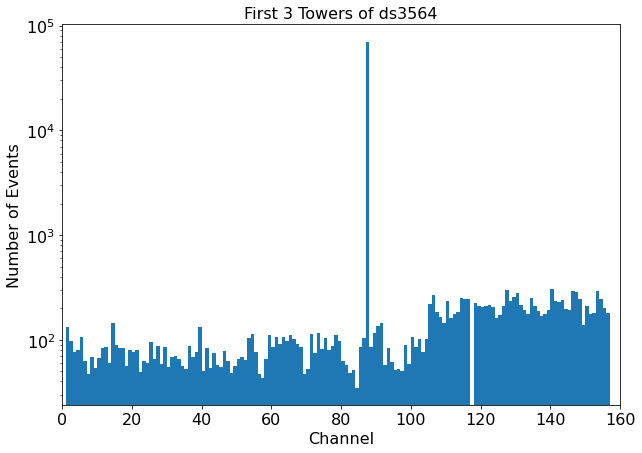

In [73]:
#1D histogram:
plt.figure(figsize=(10,7)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title('First 3 Towers of ds3564',fontsize=16)
plt.xlabel('Channel',fontsize=16)
plt.ylabel('Number of Events',fontsize=16)
array=plt.hist(alldata['Channel'].values, np.linspace(0,989,990) )#np.linspace function is hlepful for generating bins
# defining array= just prevents the function from printing the array of histogram values;
#if you need them to do further analysis e.g. fitting then it will be useful, otherwise it just stops the
#function from cluttering your display in-line
plt.gca().set_yscale("log") #set y-scale to be logarithmic (x-scale works the same way)
plt.xlim([0,160])

So that's pretty good, but often we want a line-style histogram as opposed to a filled-in histogram, this can be done by adding the optional argument histtype='step' to the plt.hist function:

(0.0, 160.0)

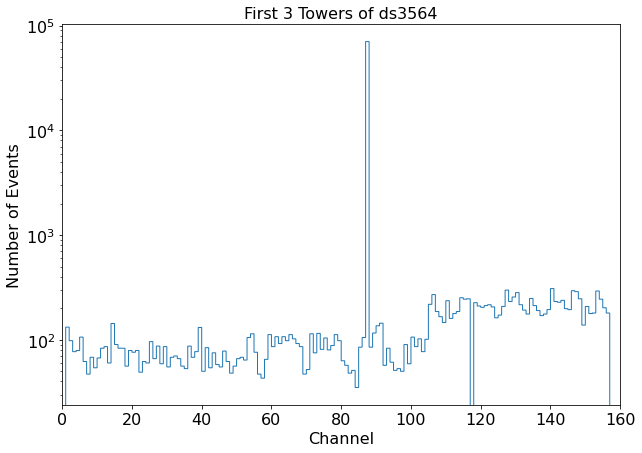

In [74]:
#1D histogram:
plt.figure(figsize=(10,7)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title('First 3 Towers of ds3564',fontsize=16)
plt.xlabel('Channel',fontsize=16)
plt.ylabel('Number of Events',fontsize=16)
array=plt.hist(alldata['Channel'].values, np.linspace(0,989,990), histtype='step')#np.linspace function is hlepful for generating bins
# defining array= just prevents the function from printing the array of histogram values;
#if you need them to do further analysis e.g. fitting then it will be useful, otherwise it just stops the
#function from cluttering your display in-line
plt.gca().set_yscale("log") #set y-scale to be logarithmic (x-scale works the same way)
plt.xlim([0,160])

Then you can adjust the colour, linestyle, etc. of the histogram as well; often the matplotlib kwaargs (optional arguments) are useful for changing the appearance of such attributes.

Try plotting the energy of all the events, and try adjusting the binning, range and how it looks both with a logarithmic and linear y-axis.



Line plot:

Less-often applied to plotting data (more often a scatter plot will be used, unless you have a time series for which it makes sense to connect the points), but quite useful in plotting other functions or models that you want to display alongside your data.

In [75]:
#let's say we have a function we want to plot:

def MyFunc(x,a,b):
    return np.sin(a*x)+b

(-10.0, 10.0)

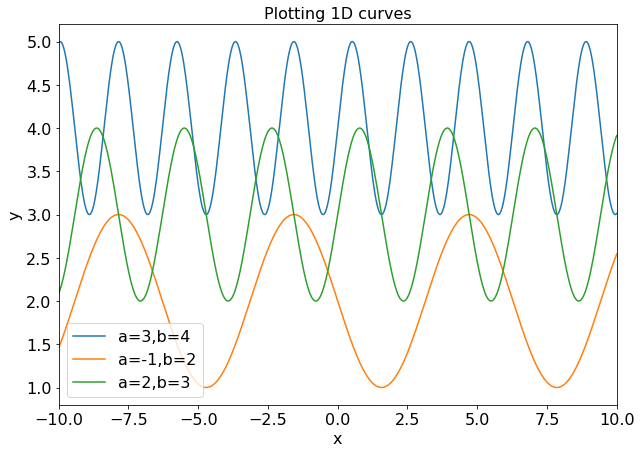

In [76]:
#Line Plot:
plt.figure(figsize=(10,7)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title('Plotting 1D curves',fontsize=16)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
xvalues=np.linspace(-10,10,1000)

#plots a series of points (x,y) and connects them
plt.plot(xvalues, MyFunc(xvalues,3,4),label='a=3,b=4')
plt.plot(xvalues, MyFunc(xvalues,-1,2),label='a=-1,b=2')
plt.plot(xvalues, MyFunc(xvalues,2,3),label='a=2,b=3')


plt.legend(fontsize=16) #adds a legend

plt.xlim([-10,10])

Some other useful things you might run into are wanting to just make a vertical or horizontal line (plt.axhline or axvline) filling between two curves (plt.fill_between) or adding a grid to the background of your plot (plt.grid)

Scatter plot:

Sometimes it doesn't suffice to just look at 1 variable, and we want to see patterns, distributions, etc. in how two variables are related.
Scatter plots are also useful when we have collected a data set of points an wish to understand how they might be connected.

(0.0, 12000.0)

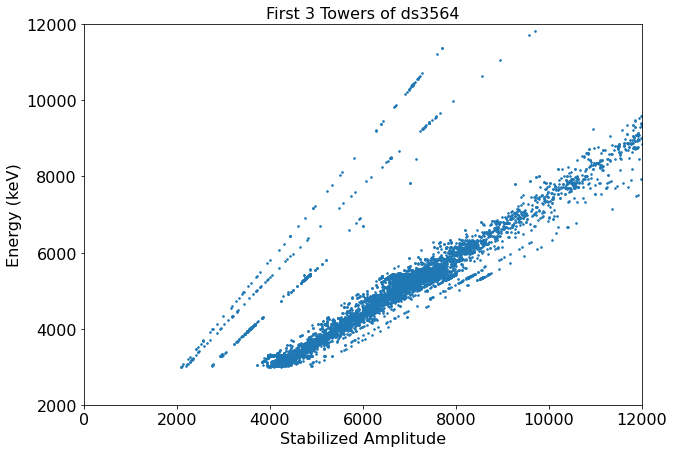

In [77]:
#Scatter plot:
plt.figure(figsize=(10,7)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title('First 3 Towers of ds3564',fontsize=16)
plt.xlabel('Stabilized Amplitude',fontsize=16)
plt.ylabel('Energy (keV)',fontsize=16)

plt.scatter(alldata['StabAmp'].values,alldata['SelectedEnergy'].values, marker='.',s=10)
#plt.gca().set_yscale("log") #set y-scale to be logarithmic (x-scale works the same way)
plt.ylim([2000,12000])
plt.xlim([0,12000])

So we see that energy is quite closely related to the stabilized amplitude in a linear fashion, but it seems to have a different proportionality in different cases (the different "lines" seen in the plot).  Likely that's because the response of each crystal is slightly different, but we'd have to check that to make sure.  Try to select just the events on a given channel and reproduce this plot.


Different markers can be used for improving plot legibility and plotting more than 1 data set at the same time.

So scatter plots are great for understanding the relationship between two variables, but in regions that are extremely dense it can be difficult to get a quantitative sense of how "occupied" a region is since eventually the points will just overlap over each other... as an example, consider the following plot:

(0.0, 10.0)

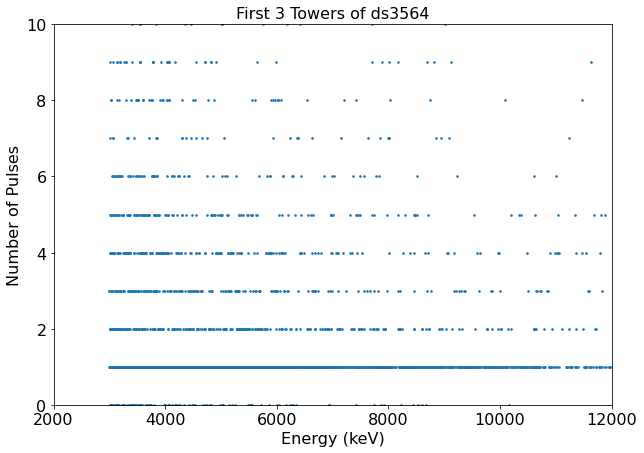

In [78]:
#Scatter plot:
plt.figure(figsize=(10,7)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title('First 3 Towers of ds3564',fontsize=16)
plt.xlabel('Energy (keV)',fontsize=16)
plt.ylabel('Number of Pulses',fontsize=16)

plt.scatter(alldata['SelectedEnergy'].values,alldata['NumPulses'].values, marker='.',s=10)
#plt.gca().set_yscale("log") #set y-scale to be logarithmic (x-scale works the same way)
plt.xlim([2000,12000])
plt.ylim([0,10])

Since NumPulses is always an integer, it's difficult to determine just how many times more there are of a given NumPulses compared to the rest; for this we can use a 2D histogram:

Text(0, 0.5, 'Number of Pulses')

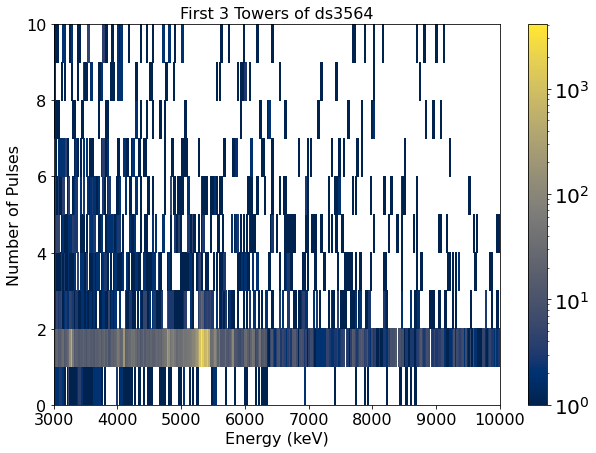

In [79]:
fig, ax = plt.subplots(figsize=(10,7)) #in this case we need more control over both the figure and it's axes
#define the x and y data and bins to make our life easier:
xdata=alldata['SelectedEnergy'].values
ydata=alldata['NumPulses'].values
x_bins=np.linspace(3000,10000,300)
y_bins=np.linspace(0,10,11)

counts,_,_= np.histogram2d(ydata, xdata, bins=(y_bins, x_bins))

plt.tick_params(labelsize=16)

pcolor=ax.pcolormesh(x_bins, y_bins, counts, cmap='cividis',norm=LogNorm()) #colormesh, replace LogNorm if you want linear binning
#I personally like cividis as the colorscale since it works in greyscale as well as colour, but you can
#check out matplotlib's option! plasma looks pretty good too
cbar=fig.colorbar(pcolor) #controls colourbar on the side
cbar.ax.tick_params(labelsize=20)
plt.title('First 3 Towers of ds3564',fontsize=16)
plt.xlabel('Energy (keV)',fontsize=16)
plt.ylabel('Number of Pulses',fontsize=16)

That's better! We can see there are MANY times more NumPulses==1 events than the rest, and we can see the alpha events at ~5.3 MeV.

Lastly what if we want to save our plots?

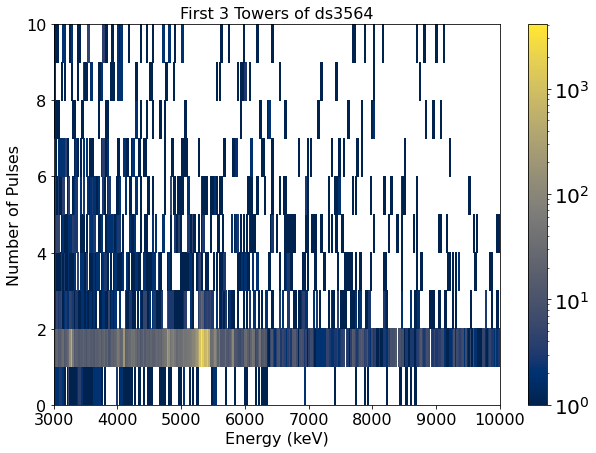

In [80]:
fig, ax = plt.subplots(figsize=(10,7)) #in this case we need more control over both the figure and it's axes
#define the x and y data and bins to make our life easier:
xdata=alldata['SelectedEnergy'].values
ydata=alldata['NumPulses'].values
x_bins=np.linspace(3000,10000,300)
y_bins=np.linspace(0,10,11)

counts,_,_= np.histogram2d(ydata, xdata, bins=(y_bins, x_bins))

plt.tick_params(labelsize=16)

pcolor=ax.pcolormesh(x_bins, y_bins, counts, cmap='cividis',norm=LogNorm()) #colormesh, replace LogNorm if you want linear binning
#I personally like cividis as the colorscale since it works in greyscale as well as colour, but you can
#check out matplotlib's option! plasma looks pretty good too
cbar=fig.colorbar(pcolor) #controls colourbar on the side
cbar.ax.tick_params(labelsize=20)
plt.title('First 3 Towers of ds3564',fontsize=16)
plt.xlabel('Energy (keV)',fontsize=16)
plt.ylabel('Number of Pulses',fontsize=16)


#save figure! can be saved as a variety of formats, but (high quality) png and vector graphic pdf are the most useful
plt.savefig('MyPlotName.pdf',bbox_inches = "tight")
plt.savefig('MyPlotName.png',dpi=300,bbox_inches = "tight")

With that in mind, try to use these tools to determine the following:

-what channels are noisy (like in the first histogram). Are they noisy for the entire data set? Are we able to say anything about what the noisy events look like? e.g. can they be separated from the rest, or do we just need to cut the entire channel out of the analysis altogether?
-what channels are dead? and are they dead over the entire dataset?
-plotting only the events with NumPulses==1 (so you'll have to select these specifically!), plot the energy distribution across all channels.

Let's start with all of that, let me know if you have any questions!